<a href="https://colab.research.google.com/github/V4IDIK/Spotify-Songs-EDA-Recommendation-System/blob/main/Spotify_songs_eda_%26_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/30000-spotify-songs/readme.md
/kaggle/input/30000-spotify-songs/spotify_songs.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/kaggle/input/30000-spotify-songs/spotify_songs.csv')
data.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

# EDA

In [ ]:
df = data.copy()
df = df.groupby('track_name', group_keys=False).apply(lambda x: x.loc[x['track_popularity'].idxmax()])

In [ ]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,,,,,,,,,,,,,,,,,,,,,
"""I TRIED FOR YEARS... NOBODY LISTENED""",0WEI3cNqwQ1nyWYsBw3n7f,"""I TRIED FOR YEARS... NOBODY LISTENED""",Iceberg Black,18,33HL1PHasNglK2aUYwxG8f,WAR,2018-09-22,Rap Party 24/7 Radio / Gangsta Rap,4sGnz2x5tbHE2YlW1nemfb,rap,...,10,-6.712,0,0.1410,0.026800,0.001790,0.116,0.0944,140.026,150909
"""This Is Seagull….""",5jCOeqjJRnRo27b9Hb8xHp,"""This Is Seagull….""",The Snake Corps,34,60P4s9euug8W1iqDEYVKmL,Smother Earth,1990-01-01,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",2nRWtTI9a2LWjJ9Wy3JZs5,pop,...,9,-13.288,0,0.0295,0.000002,0.857000,0.110,0.2350,135.903,238227
#1 Stunna,7kBdenpTmgWfAz9clmBcok,#1 Stunna,Big Tymers,48,7pe02mW4PQwNJkrmSup7bu,I Got That Work,2000-01-01,Hip-Hop Drive,37i9dQZF1DWUFmyho2wkQU,rap,...,8,-4.961,1,0.2850,0.017600,0.003270,0.258,0.5610,89.017,281960
#NAKAMA,3PYjJW2UuhMUUP1TSF9NDD,#NAKAMA,XLII,26,2LGXdk4yoQZnnoBoxrj8iP,#NAKAMA,2019-12-25,Girl On Fire,37i9dQZF1DX4F2k37fMTyn,r&b,...,3,-3.204,1,0.0545,0.385000,0.000157,0.318,0.5680,108.041,192094
#Natural,3cRJo0hXMcrXa7oLfAUU4d,#Natural,Paty Cantú,50,6gi1JqZbK74yWCKTpiC022,#Natural,2017-10-20,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,0,-3.535,0,0.0568,0.114000,0.000000,0.134,0.8160,97.023,227013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
숙녀 (淑女) Lady,62pLjWF5RRPQg3mPCLDwf7,숙녀 (淑女) Lady,Yubin,17,340MUbVwBnwhqVACCdOSdj,都市女子,2018-06-05,Japanese Funk/Soul/NEO/Jazz/Acid,4zNayWuATXCAA9gaXvnFnq,r&b,...,9,-3.378,1,0.1700,0.234000,0.000051,0.400,0.8470,119.810,196093
쉼표,37Gq1KAg6bV3KAp32xOoFL,쉼표,Kozypop,30,6LHDppZ2sqbcy3uNub0duJ,"Seoul Vibes, Pt​. 4",2018-10-01,K-Crazy Michioso Tunes,37i9dQZF1DWUXxc8Mc6MmJ,edm,...,3,-4.144,0,0.2000,0.855000,0.000000,0.196,0.3770,82.199,150178
중독 Overdose,7MirWQBco3ZiuwvcdYaNSe,중독 Overdose,EXO-K,4,5P76th5WUjiqXxTYIgTXsG,The 2nd Mini Album '중독 Overdose',2014-08-06,K-Crazy Michioso Tunes,37i9dQZF1DWUXxc8Mc6MmJ,edm,...,5,-1.797,0,0.1640,0.061500,0.000000,0.358,0.6520,112.357,205612


In [ ]:
df = df.drop(['track_name','track_id','playlist_id','track_album_id'], axis = 1)
df['duration_ms'] = df['duration_ms'].apply(lambda x: x/60000)
df

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,,,,,,,,,,,,,,,,,,,
"""I TRIED FOR YEARS... NOBODY LISTENED""",Iceberg Black,18,WAR,2018-09-22,Rap Party 24/7 Radio / Gangsta Rap,rap,gangster rap,0.914,0.408,10,-6.712,0,0.1410,0.026800,0.001790,0.116,0.0944,140.026,2.515150
"""This Is Seagull….""",The Snake Corps,34,Smother Earth,1990-01-01,"Maxi Pop GOLD (New Wave, Electropop, Synth Po...",pop,electropop,0.516,0.580,9,-13.288,0,0.0295,0.000002,0.857000,0.110,0.2350,135.903,3.970450
#1 Stunna,Big Tymers,48,I Got That Work,2000-01-01,Hip-Hop Drive,rap,hip hop,0.552,0.842,8,-4.961,1,0.2850,0.017600,0.003270,0.258,0.5610,89.017,4.699333
#NAKAMA,XLII,26,#NAKAMA,2019-12-25,Girl On Fire,r&b,hip pop,0.797,0.970,3,-3.204,1,0.0545,0.385000,0.000157,0.318,0.5680,108.041,3.201567
#Natural,Paty Cantú,50,#Natural,2017-10-20,latin hip hop,latin,latin hip hop,0.800,0.836,0,-3.535,0,0.0568,0.114000,0.000000,0.134,0.8160,97.023,3.783550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
숙녀 (淑女) Lady,Yubin,17,都市女子,2018-06-05,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,neo soul,0.473,0.973,9,-3.378,1,0.1700,0.234000,0.000051,0.400,0.8470,119.810,3.268217
쉼표,Kozypop,30,"Seoul Vibes, Pt​. 4",2018-10-01,K-Crazy Michioso Tunes,edm,pop edm,0.429,0.724,3,-4.144,0,0.2000,0.855000,0.000000,0.196,0.3770,82.199,2.502967
중독 Overdose,EXO-K,4,The 2nd Mini Album '중독 Overdose',2014-08-06,K-Crazy Michioso Tunes,edm,pop edm,0.498,0.917,5,-1.797,0,0.1640,0.061500,0.000000,0.358,0.6520,112.357,3.426867


In [ ]:
df.columns

Index(['track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
# Top 10 popularity songs
df_popularity = df.sort_values(by='track_popularity', ascending=False)
df_popularity[['track_artist','track_album_name','playlist_name','playlist_genre','track_popularity']].head(10)

,track_artist,track_album_name,playlist_name,playlist_genre,track_popularity
track_name,,,,,
Dance Monkey,Tones and I,Dance Monkey (Stripped Back) / Dance Monkey,"post-teen alternative, indie, pop (large variety)",pop,100
ROXANNE,Arizona Zervas,ROXANNE,Global Top 50 | 2020 Hits,latin,99
Circles,Post Malone,Hollywood's Bleeding,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,98
Blinding Lights,The Weeknd,Blinding Lights,Todo Éxitos,pop,98
Memories,Maroon 5,Memories,Todo Éxitos,pop,98
Tusa,KAROL G,Tusa,Todo Éxitos,pop,98
The Box,Roddy Ricch,Please Excuse Me For Being Antisocial,RapCaviar,rap,98
everything i wanted,Billie Eilish,everything i wanted,Todo Éxitos,pop,97
Don't Start Now,Dua Lipa,Don't Start Now,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,97


In [ ]:
# Top 10 danceability songs
df_danceability = df.sort_values(by='danceability', ascending=False)
df_danceability[['track_artist','track_album_name','playlist_name','playlist_genre','danceability']].head(10)

,track_artist,track_album_name,playlist_name,playlist_genre,danceability
track_name,,,,,
If Only I Could (feat. Steve Lucas) - Liem Remix,Fusion Groove Orchestra,If Only I Could (feat. Steve Lucas),House/Electro/Progressive/Disco/Lofi/Synthwave,edm,0.983
Mega Run - Downtown Jump,DJ ZsuZsu,Mega Run (Downtown Jump),Electro Swing Top 100,edm,0.981
Enseñame a Soñar - Original Mix,DJ Goozo,Enseñame a Soñar,Verano Forever,latin,0.979
Ice Ice Baby,Vanilla Ice,Vanilla Ice Is Back! - Hip Hop Classics,90s Dance Hits,pop,0.979
Cha Cha Slide - Original Live Platinum Band Mix,DJ Casper,Cha Cha Slide,School Dance 2019 (Squeaky Clean),latin,0.978
Get Down on It,Central Coast Clique,Underworld For Life Vol. 1,Chicano Rap,latin,0.975
Funky Friday,Dave,Funky Friday,Rap Workout,rap,0.975
Bad Bad Bad (feat. Lil Baby),Young Thug,So Much Fun,Hip-Hop Favourites,rap,0.974
In da Wind,Trick Daddy,Thug Holiday (Explicit Version),Southern Hip Hop,rap,0.974


In [ ]:
# Top 10 Most positive songs
df_hapiness = df.sort_values(by='valence', ascending=False)
df_hapiness[['track_artist','track_album_name','playlist_name','playlist_genre','valence']].head(10)

,track_artist,track_album_name,playlist_name,playlist_genre,valence
track_name,,,,,
Low Rider,War,Why Can't We Be Friends?,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,0.990
What a Fool Believes,The Doobie Brothers,Minute By Minute,Soft Rock Drive,rock,0.985
Counterlight,1986 Omega Tribe,Crystal Night,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,0.984
Can't Get Enough! - Vocal Club Mix,Soulsearcher,Can't Get Enough,House/Electro/Progressive/Disco/Lofi/Synthwave,edm,0.983
You Love It!,ripmattblack,You Love It!,The Pulse of Indie Poptimism,pop,0.981
Material Girl,Madonna,Like a Virgin (Reissue),80's Songs | Top 💯 80s Music Hits,pop,0.981
GAME OVER,Humming Urban Stereo,GAME OVER,K-Crazy Michioso Tunes,edm,0.980
Ryd,Steve Lacy,Steve Lacy's Demo,Urban Contemporary,r&b,0.979
ZCN,Alizzmatic,The Port,House Electro 2019,edm,0.979


In [ ]:
df_artist = df.copy()
df_artist = df_artist.groupby('track_artist', group_keys=False)
df_artist_count = df_artist[numerical_columns].count()
df_artist_mean = df_artist[numerical_columns].mean()
artists_more_ten_musics = df_artist_count[(df_artist_count['track_popularity']>10)].index
df_artist_mean.filter(items = artists_more_ten_musics, axis=0)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_artist,,,,,,,,,,,,,
$uicideBoy$,57.040000,0.768240,0.680040,3.840000,-5.835280,0.680000,0.147676,0.182338,0.093998,0.198668,0.256604,119.077000,2.280659
2Pac,42.194444,0.784083,0.771889,5.166667,-5.169778,0.722222,0.207281,0.079381,0.000565,0.239819,0.684806,108.257167,4.659400
50 Cent,27.387097,0.656871,0.762226,6.193548,-4.202226,0.451613,0.269755,0.136110,0.000276,0.181774,0.588419,107.056323,3.792227
6LACK,52.307692,0.610846,0.488462,4.153846,-8.358923,0.538462,0.212185,0.328388,0.001617,0.126138,0.225323,124.228077,3.922555
AC/DC,71.384615,0.500538,0.832308,6.076923,-5.080231,0.769231,0.091238,0.048119,0.094354,0.199269,0.468538,131.257846,4.441367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ Top,50.916667,0.609583,0.754000,5.500000,-8.304083,0.750000,0.070333,0.053924,0.016538,0.135825,0.637417,117.946917,4.046760
Zara Larsson,61.769231,0.637308,0.778538,6.692308,-4.724769,0.461538,0.076538,0.088831,0.000040,0.176631,0.481692,123.382615,3.183150
Zedd,42.173913,0.636696,0.781000,6.130435,-4.233870,0.434783,0.052761,0.076943,0.001441,0.155496,0.377913,127.265348,3.860760


In [ ]:
# Top 10 Most popular artists
df_artist_mean.sort_values(by='track_popularity', ascending=False)[:10]

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_artist,,,,,,,,,,,,,
Trevor Daniel,97.000000,0.784000,0.430000,10.000000,-8.756000,0.000000,0.036400,0.123000,0.000000,0.088700,0.236000,127.087000,2.656367
Y2K,91.000000,0.843000,0.391000,2.000000,-7.899000,1.000000,0.084500,0.181000,0.000000,0.137000,0.496000,129.972000,2.677117
Ali Gatie,89.000000,0.732000,0.463000,11.000000,-6.972000,0.000000,0.028700,0.374000,0.000000,0.194000,0.397000,95.971000,3.543450
Ant Saunders,89.000000,0.865000,0.438000,7.000000,-8.943000,1.000000,0.071900,0.177000,0.000000,0.074300,0.695000,129.038000,3.720967
Don Toliver,87.500000,0.703000,0.701500,4.000000,-4.775500,0.500000,0.105000,0.405500,0.000431,0.172000,0.511500,137.997500,2.590692
Kina,85.500000,0.510000,0.181500,2.500000,-17.629000,0.500000,0.111850,0.807000,0.013000,0.119050,0.106750,114.451500,3.058433
MEDUZA,85.333333,0.690667,0.710000,10.000000,-6.615000,0.000000,0.037433,0.066867,0.004620,0.182667,0.450667,124.016000,2.709733
Juice WRLD,85.000000,0.651222,0.621111,3.888889,-5.816667,0.555556,0.174289,0.166667,0.000041,0.181244,0.358333,132.145222,3.428739
JACKBOYS,84.333333,0.751667,0.622333,5.666667,-5.111000,0.666667,0.290000,0.072133,0.000000,0.237333,0.449667,135.452667,3.242322


In [ ]:
# Top 10 Most danceability artists
df_artist_mean.sort_values(by='danceability', ascending=False)[:10]

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_artist,,,,,,,,,,,,,
Fusion Groove Orchestra,41.0,0.983,0.936,9.0,-8.541,0.0,0.3250,0.0943,0.7190,0.0902,0.878,126.000,7.115750
DJ ZsuZsu,27.0,0.981,0.794,0.0,-7.340,0.0,0.1960,0.1250,0.4960,0.1200,0.808,124.960,3.380850
DJ Goozo,65.0,0.979,0.923,3.0,-4.101,1.0,0.0759,0.0364,0.1570,0.0735,0.253,128.029,4.000317
[dunkelbunt],47.0,0.974,0.596,8.0,-7.835,0.0,0.2260,0.1560,0.5130,0.4180,0.920,121.513,4.013550
Cal Scruby,57.0,0.971,0.580,10.0,-6.294,1.0,0.0965,0.4850,0.0000,0.0534,0.865,118.981,2.689083
WE$T DUBAI,63.0,0.971,0.507,0.0,-7.575,1.0,0.2220,0.0213,0.0000,0.1010,0.716,127.039,3.544800
Greenskeepers,22.0,0.970,0.557,1.0,-5.723,1.0,0.1440,0.3480,0.0559,0.0878,0.514,124.998,8.296467
Westside Cartel,21.0,0.968,0.551,11.0,-5.204,0.0,0.2340,0.0557,0.0000,0.4880,0.617,107.016,5.220667
Sydney Yungins,55.0,0.967,0.627,1.0,-4.658,1.0,0.1570,0.4210,0.0000,0.2680,0.792,109.017,3.412850


In [ ]:
# Top 10 most acousticness artists
df_artist_mean.sort_values(by='acousticness', ascending=False)[:10]

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_artist,,,,,,,,,,,,,
Simón Campusano,48.0,0.618,0.2990,1.0,-13.816,0.0,0.0294,0.989,0.002610,0.1310,0.434,96.457,3.104533
Christian Leave,66.0,0.608,0.2690,0.0,-7.201,1.0,0.0329,0.983,0.000002,0.3370,0.389,126.372,2.261900
The Magnetic Fields,60.0,0.484,0.2620,7.0,-13.286,1.0,0.0263,0.978,0.000060,0.1170,0.332,98.516,2.706883
Gary Jules,70.0,0.345,0.0581,3.0,-17.217,1.0,0.0374,0.976,0.000366,0.1030,0.304,174.117,3.158450
Wenzel,57.0,0.595,0.2850,11.0,-14.360,0.0,0.0371,0.973,0.946000,0.1460,0.305,130.021,1.969233
organic_kid,47.0,0.589,0.1940,5.0,-13.551,1.0,0.0974,0.972,0.873000,0.0841,0.474,82.123,2.725000
Mark Isham,0.0,0.596,0.1300,9.0,-20.747,1.0,0.0343,0.972,0.880000,0.3670,0.539,124.449,1.956000
La Lá,45.0,0.629,0.1890,9.0,-14.598,1.0,0.0682,0.972,0.006590,0.1080,0.441,118.402,3.396800
Manny,47.0,0.416,0.4230,9.0,-15.069,0.0,0.2480,0.970,0.928000,0.2060,0.410,76.372,1.856350


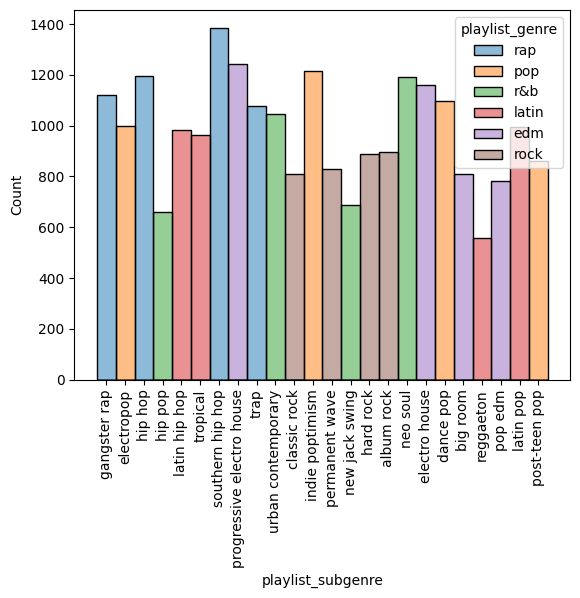

In [ ]:
sns.histplot(df, x='playlist_subgenre', hue='playlist_genre')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Popularity')

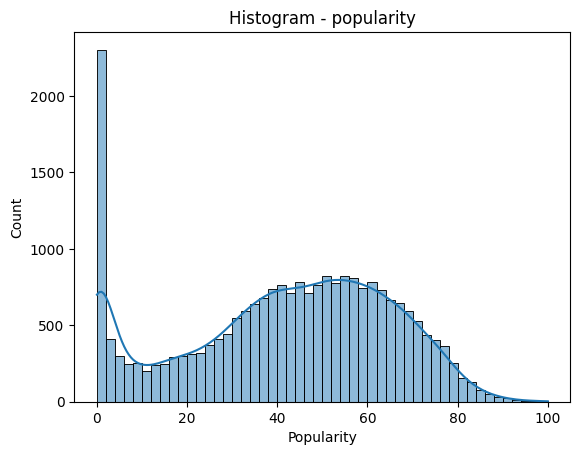

In [ ]:
sns.histplot(df, x='track_popularity', bins=50, kde=True)
plt.title('Histogram - popularity')
plt.xlabel('Popularity')

Text(0.5, 0, 'Popularity')

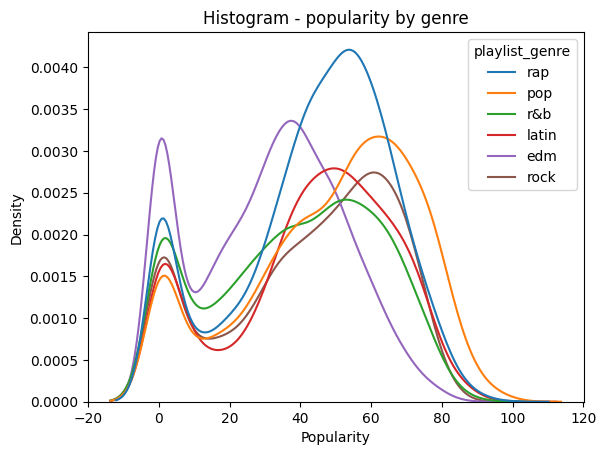

In [ ]:
sns.kdeplot(df, x='track_popularity', hue='playlist_genre')
plt.title('Histogram - popularity by genre')
plt.xlabel('Popularity')

Text(0.5, 0, 'Valence')

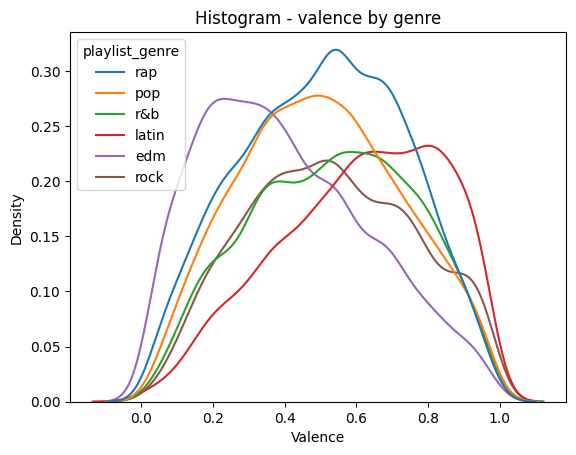

In [ ]:
sns.kdeplot(df, x='valence', hue='playlist_genre')
plt.title('Histogram - valence by genre')
plt.xlabel('Valence')

Text(0.5, 0, 'Danceability')

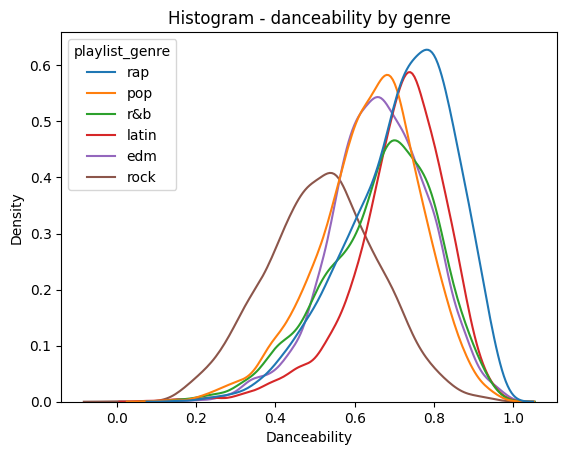

In [ ]:
sns.kdeplot(df, x='danceability', hue='playlist_genre')
plt.title('Histogram - danceability by genre')
plt.xlabel('Danceability')

<Axes: >

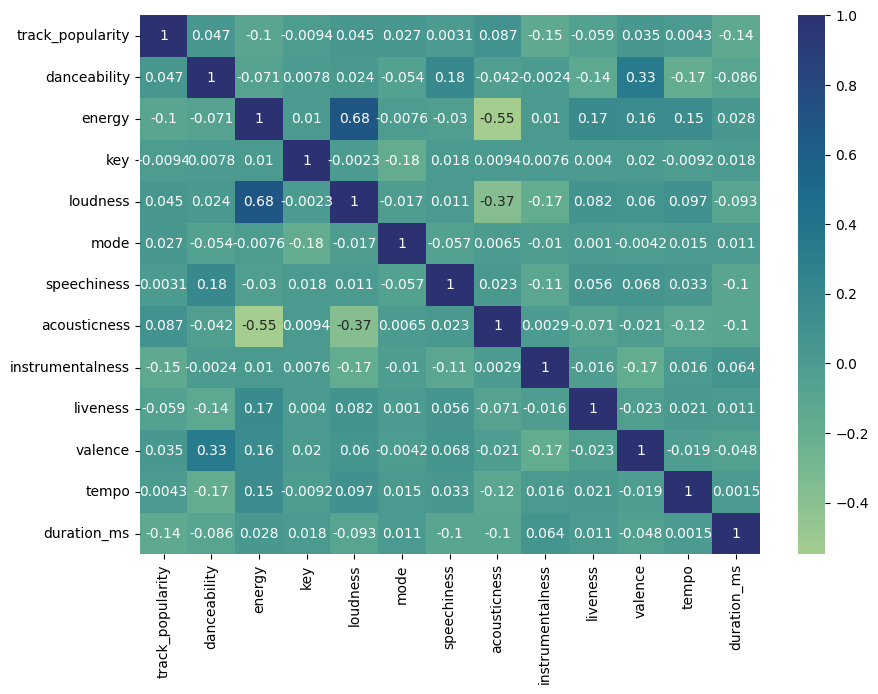

In [ ]:
# heatmap by musics
plt.figure(figsize=(10,7))
sns.heatmap(data=df[numerical_columns].corr(),annot=True,cmap='crest')

# Recomendation System
1. Cosine-similarity
2. KNN

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df['line'] = [i for i in range(df.shape[0])]
df[7000:]

,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,line
track_name,,,,,,,,,,,,,,,,,,,,
GUD VIBRATIONS,NGHTMRE,63,GUD VIBRATIONS,2016-10-26,Indie Poptimism,pop,indie poptimism,0.514,0.924,8,-5.417,1,0.0520,0.000208,0.805000,0.0684,0.0675,151.994,3.736850,7000
GUD VIBRATIONS - Habstrakt Remix,NGHTMRE,57,GUD VIBRATIONS (Habstrakt Remix),2019-09-24,Nasty Bits,edm,electro house,0.681,0.969,11,-1.830,1,0.1300,0.004510,0.221000,0.5260,0.1840,124.936,3.394650,7001
GUMMO,6ix9ine,0,DAY69,2018-02-23,GANGSTA RAP,rap,gangster rap,0.691,0.778,1,-4.957,1,0.1340,0.046500,0.000000,0.1360,0.6850,78.496,2.627383,7002
GUMMY,BROCKHAMPTON,65,SATURATION II,2017-08-25,Urban Contemporary,r&b,urban contemporary,0.687,0.672,0,-5.975,0,0.0573,0.198000,0.000000,0.1750,0.7920,80.035,4.350000,7003
GURU,Maski & Banga,28,GURU,2019-11-22,Big Room EDM,edm,big room,0.665,0.980,1,-1.533,0,0.1290,0.003900,0.040100,0.1050,0.2050,127.938,2.316400,7004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
숙녀 (淑女) Lady,Yubin,17,都市女子,2018-06-05,Japanese Funk/Soul/NEO/Jazz/Acid,r&b,neo soul,0.473,0.973,9,-3.378,1,0.1700,0.234000,0.000051,0.4000,0.8470,119.810,3.268217,23444
쉼표,Kozypop,30,"Seoul Vibes, Pt​. 4",2018-10-01,K-Crazy Michioso Tunes,edm,pop edm,0.429,0.724,3,-4.144,0,0.2000,0.855000,0.000000,0.1960,0.3770,82.199,2.502967,23445
중독 Overdose,EXO-K,4,The 2nd Mini Album '중독 Overdose',2014-08-06,K-Crazy Michioso Tunes,edm,pop edm,0.498,0.917,5,-1.797,0,0.1640,0.061500,0.000000,0.3580,0.6520,112.357,3.426867,23446


In [ ]:
similarity = cosine_similarity(df[numerical_columns])
similarity

array([[1.        , 0.99199941, 0.93361841, ..., 0.99482   , 0.91159505,
        0.99090133],
       [0.99199941, 1.        , 0.96805225, ..., 0.97500512, 0.95122106,
        0.96900496],
       [0.93361841, 0.96805225, 1.        , ..., 0.89594899, 0.9955297 ,
        0.88298978],
       ...,
       [0.99482   , 0.97500512, 0.89594899, ..., 1.        , 0.87159726,
        0.99894136],
       [0.91159505, 0.95122106, 0.9955297 , ..., 0.87159726, 1.        ,
        0.85942381],
       [0.99090133, 0.96900496, 0.88298978, ..., 0.99894136, 0.85942381,
        1.        ]])

In [ ]:
def recomendation_song_by_cossim(music, allow_same_genre=False, only_same_genre=False):
    genre_music = df[df.index == music]['playlist_genre'][0]
    id_music = df[df.index == music]['line'].values[0]
    distances = similarity[id_music]
    music_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:]

    musics_recomendation = pd.DataFrame(columns=['Music','Artist','Album'])
    for music in music_list:

        if only_same_genre:
            if df[df['line'] == music[0]]['playlist_genre'][0] != genre_music:
                continue
        elif not allow_same_genre:
            if df[df['line'] == music[0]]['playlist_genre'][0] == genre_music:
                continue
        row = pd.DataFrame([{'Music': df[df['line'] == music[0]].index[0], 'Artist':df[df['line'] == music[0]]['track_artist'][0],'Album':df[df['line'] == music[0]]['track_album_name'][0]}])
        musics_recomendation = pd.concat([musics_recomendation, row], ignore_index=True)
        if musics_recomendation.shape[0] == 10:
            break
    return musics_recomendation

In [ ]:
recomendation_song_by_cossim('Dance Monkey')

,Music,Artist,Album
0,My Bébé,Bryan Mg,My Bébé
1,Famous Hoes,NLE Choppa,Famous Hoes
2,Praise The Lord (Da Shine) (feat. Skepta),A$AP Rocky,TESTING
3,UN PESO,J Balvin,OASIS
4,ALREADY,Beyoncé,The Lion King: The Gift
5,Feel It Still,Portugal. The Man,Woodstock
6,Aventura,Lunay,Épico
7,Hey Ya!,OutKast,Speakerboxxx/The Love Below
8,Thinking out Loud,Ed Sheeran,x (Deluxe Edition)
9,DOLLAR,Becky G,DOLLAR


In [ ]:
from sklearn.neighbors import NearestNeighbors
#from sklearn.preprocessing import StandardScaler, MaxAbsScaler, Normalizer

In [ ]:
def recomendation_song_by_knn(music):
    x_ = df[numerical_columns]
    knn = NearestNeighbors(n_neighbors=11,algorithm='brute',p=2)
    knn.fit(x_)
    music = 'Dance Monkey'
    x = df[df.index == music][numerical_columns]
    distances, indices = knn.kneighbors(x)

    musics_recomendation = pd.DataFrame(columns=['Music','Artist','Album'])
    for idx in indices.flatten():
        row = pd.DataFrame([{'Music': df[df['line'] == idx].index[0], 'Artist':df[df['line'] == idx]['track_artist'][0],'Album':df[df['line'] == idx]['track_album_name'][0]}])
        musics_recomendation = pd.concat([musics_recomendation, row], ignore_index=True)
    return musics_recomendation[1:]

In [ ]:
recomendation_song_by_knn('Dance Monkey')

,Music,Artist,Album
1,Tusa,KAROL G,Tusa
2,Lose You To Love Me,Selena Gomez,Lose You To Love Me
3,Memories,Maroon 5,Memories
4,RITMO (Bad Boys For Life),The Black Eyed Peas,RITMO (Bad Boys For Life)
5,South of the Border (feat. Camila Cabello & Ca...,Ed Sheeran,No.6 Collaborations Project
6,My Oh My (feat. DaBaby),Camila Cabello,Romance
7,Adore You,Harry Styles,Adore You
8,Ayy Macarena,Tyga,Ayy Macarena
9,Ballin' (with Roddy Ricch),Mustard,Perfect Ten
10,China,Anuel AA,China
